<a href="https://colab.research.google.com/github/salmanromeo/CS_5783_Machine_Learning_Fall_2022/blob/main/CS_5783_Fall_2022_Assignment_3_Deep_learning/CS_5783_Fall_2022_Assignment_3_Deep_learning_Q1_Glass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem 1**

#####Design a convolutional neural network in Keras of at least 10 convolutional layers. Use the MNIST dataset for evaluation. You must try three designs as detailed below and provide your observations on the performance of each:
1.   A regular CNN where the number of filters in each layer increases as the depth of the 
network grows i.e., the Lth layer will have more filters than the (L-1)th layer.
2.   An inverted CNN where the number of filters in each layer decreases as the depth of the network grows i.e., the Lth layer will have less filters than the (L-1)th layer.
1.   An hour-glass shaped CNN where the number of filters will increase till the Lth layer and reduce afterwards.

#####Your goal is to design these networks and optimize them to their best performance by choosing the right hyperparameters for each network, such as the learning rate, batch size and the choice of optimizer (‘SGD’, ‘adam’, ‘RMSProp’). You must provide a detailed report of what values you tried for each hyperparameters, your observations on why the network performed well (or not) and the final accuracy for each network on the MNIST dataset.

#####You can refer to the Keras documentation for more details.




**Solution 1**

**Libraries**

In [1]:
from datetime import datetime
from packaging import version

import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow as tf

**Loading Data**

In [2]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()
train_images = train_images / 255.0
test_images = test_images / 255.0 
train_images = np.expand_dims(train_images, axis=-1)
test_images = np.expand_dims(test_images, axis=-1)
print(train_images.shape)

# Add an additional dimension to represent the single-channel
x_train = train_images.reshape(-1, 28, 28, 1)
x_test = test_images.reshape(-1, 28, 28, 1)
x_train = train_images.reshape(-1, 28, 28, 1)
x_test = test_images.reshape(-1, 28, 28, 1)

11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28, 1)


**Plotting**

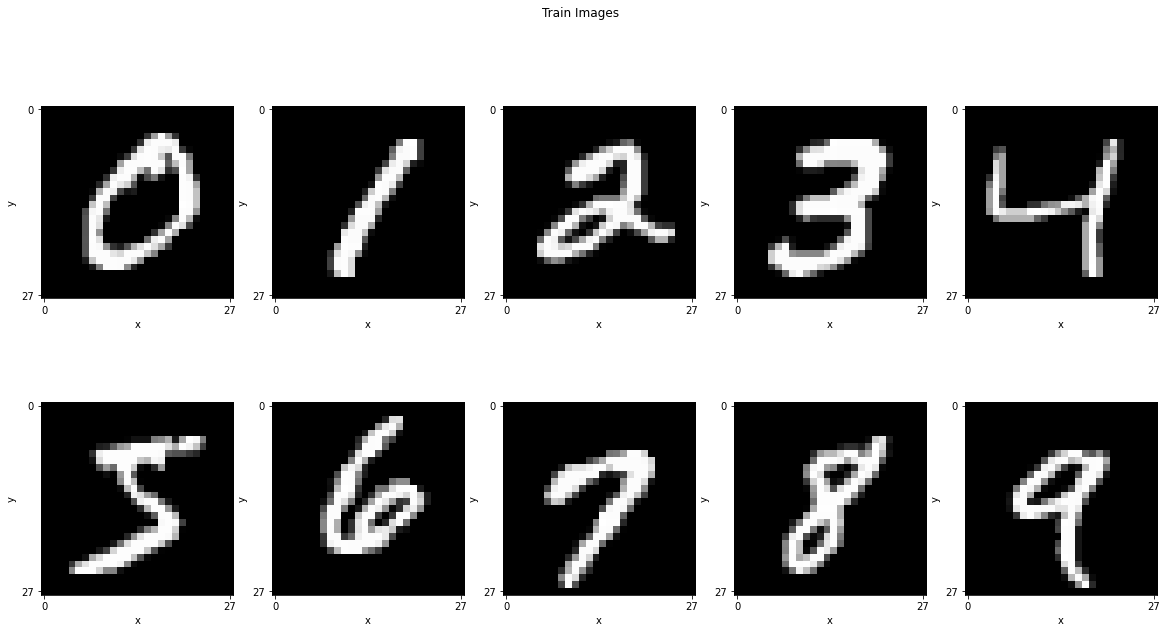

In [3]:
# Plotting
fig, ax = plt.subplots(2,5,figsize = (20, 10))
fig.suptitle('Train Images')
ax = ax.flatten()
for i in range(10):
    im_idx = np.argwhere(train_labels == i)[0]
    ax[i].set(xlabel='x', ylabel='y')
    plt.setp(ax, xticks=[0, 27], yticks=[0, 27])
    plottable_image = np.reshape(train_images[im_idx], (28, 28))
    ax[i].imshow(plottable_image, cmap='gray')

**1.3 Hour-glass shaped CNN**

In [4]:
cnn_model_g = tf.keras.models.Sequential()
cnn_model_g.add(tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
cnn_model_g.add(tf.keras.layers.Conv2D(64, (3, 3), strides=(2, 2), padding='same', activation='relu'))
cnn_model_g.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='same'))
cnn_model_g.add(tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
cnn_model_g.add(tf.keras.layers.Conv2D(128, (3, 3), strides=(2, 2), padding='same', activation='relu'))
cnn_model_g.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2),padding='same'))
cnn_model_g.add(tf.keras.layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
cnn_model_g.add(tf.keras.layers.Conv2D(256, (3, 3), strides=(2, 2), padding='same', activation='relu'))
cnn_model_g.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2),padding='same'))
cnn_model_g.add(tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
cnn_model_g.add(tf.keras.layers.Conv2D(128, (3, 3), strides=(2, 2), padding='same', activation='relu'))
cnn_model_g.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2),padding='same'))
cnn_model_g.add(tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
cnn_model_g.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2),padding='same'))
cnn_model_g.add(tf.keras.layers.Conv2D(64, (3, 3), strides=(2, 2), padding='same', activation='relu'))

cnn_model_g.add(tf.keras.layers.Flatten())
cnn_model_g.add(tf.keras.layers.Dense(512))
cnn_model_g.add(tf.keras.layers.Activation('relu'))
cnn_model_g.add(tf.keras.layers.Dense(10))
cnn_model_g.add(tf.keras.layers.Activation('softmax'))

cnn_model_g.compile(loss='sparse_categorical_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])
cnn_model_g.build(input_shape=(1,28,28,1))
cnn_model_g.summary()

model_cnn_g = cnn_model_g
history_cnn_g = model_cnn_g.fit(x_train, train_labels, validation_split = 0.2, batch_size=512, epochs=25)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (1, 28, 28, 64)           640       
                                                                 
 conv2d_1 (Conv2D)           (1, 14, 14, 64)           36928     
                                                                 
 max_pooling2d (MaxPooling2D  (1, 7, 7, 64)            0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (1, 7, 7, 128)            73856     
                                                                 
 conv2d_3 (Conv2D)           (1, 4, 4, 128)            147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (1, 2, 2, 128)           0         
 2D)                                                    

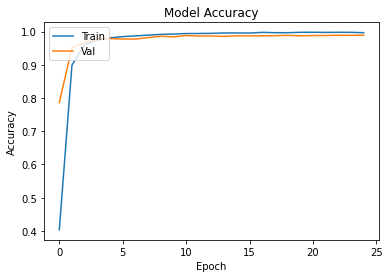

In [5]:
plt.plot(history_cnn_g.history['accuracy'])
plt.plot(history_cnn_g.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [6]:
score = model_cnn_g.evaluate(x_train, train_labels)
print('Train loss:', score[0])
print('Train accuracy:', score[1])

1875/1875 [==============================] - 8s 4ms/step - loss: 0.0169 - accuracy: 0.9958
Train loss: 0.016877416521310806
Train accuracy: 0.9958166480064392


In [7]:
score = model_cnn_g.evaluate(x_test, test_labels)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 2s 5ms/step - loss: 0.0427 - accuracy: 0.9890
Test loss: 0.042658720165491104
Test accuracy: 0.9890000224113464


**Effect of learning rate on Hour-glass shaped CNN**

In [13]:
learningRate=[0.0001, 0.001, 0.01]
acc=np.zeros(3)
for i in range(len(learningRate)):
  cnn_model_g = tf.keras.models.Sequential()
  cnn_model_g.add(tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
  cnn_model_g.add(tf.keras.layers.Conv2D(64, (3, 3), strides=(2, 2), padding='same', activation='relu'))
  cnn_model_g.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='same'))
  cnn_model_g.add(tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
  cnn_model_g.add(tf.keras.layers.Conv2D(128, (3, 3), strides=(2, 2), padding='same', activation='relu'))
  cnn_model_g.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2),padding='same'))
  cnn_model_g.add(tf.keras.layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
  cnn_model_g.add(tf.keras.layers.Conv2D(256, (3, 3), strides=(2, 2), padding='same', activation='relu'))
  cnn_model_g.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2),padding='same'))
  cnn_model_g.add(tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
  cnn_model_g.add(tf.keras.layers.Conv2D(128, (3, 3), strides=(2, 2), padding='same', activation='relu'))
  cnn_model_g.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2),padding='same'))
  cnn_model_g.add(tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
  cnn_model_g.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2),padding='same'))
  cnn_model_g.add(tf.keras.layers.Conv2D(64, (3, 3), strides=(2, 2), padding='same', activation='relu'))

  cnn_model_g.add(tf.keras.layers.Flatten())
  cnn_model_g.add(tf.keras.layers.Dense(512))
  cnn_model_g.add(tf.keras.layers.Activation('relu'))
  cnn_model_g.add(tf.keras.layers.Dense(10))
  cnn_model_g.add(tf.keras.layers.Activation('softmax'))

  cnn_model_g.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  cnn_model_g.build(input_shape=(1,28,28,1))
  accuracy= cnn_model_g.fit(train_images, train_labels, batch_size=512, epochs=25)
  acc[i]=accuracy.history['accuracy'][24]
  cnn_model_g.summary()

Epoch 1/25
118/118 [==============================] - 6s 46ms/step - loss: 1.6087 - accuracy: 0.3632
Epoch 2/25
118/118 [==============================] - 5s 43ms/step - loss: 0.4740 - accuracy: 0.8287
Epoch 3/25
118/118 [==============================] - 5s 44ms/step - loss: 0.1316 - accuracy: 0.9611
Epoch 4/25
118/118 [==============================] - 5s 44ms/step - loss: 0.0807 - accuracy: 0.9770
Epoch 5/25
118/118 [==============================] - 5s 44ms/step - loss: 0.0586 - accuracy: 0.9832
Epoch 6/25
118/118 [==============================] - 5s 44ms/step - loss: 0.0505 - accuracy: 0.9855
Epoch 7/25
118/118 [==============================] - 5s 44ms/step - loss: 0.0386 - accuracy: 0.9888
Epoch 8/25
118/118 [==============================] - 5s 44ms/step - loss: 0.0324 - accuracy: 0.9910
Epoch 9/25
118/118 [==============================] - 5s 43ms/step - loss: 0.0254 - accuracy: 0.9930
Epoch 10/25
118/118 [==============================] - 5s 43ms/step - loss: 0.0227 - accura

[0.99736667 0.99731666 0.99753332]


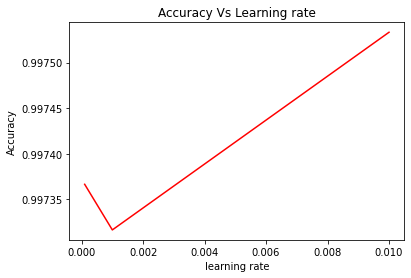

In [14]:
print(acc)
plt.plot(np.array(learningRate).reshape(3,1), np.array(acc).reshape(3,1), color = 'red')
plt.ylabel('Accuracy')
plt.xlabel('learning rate')
plt.title('Accuracy Vs Learning rate')
plt.show()

**Which one performed best**

In [11]:
from tabulate import tabulate
mydata = [[0.0001, 0.99736667],
          [0.001, 0.99731666],
          [0.01, 0.99753332]]
head = ["Learning Rate", "Accuarcy"]
# Display Table
print(tabulate(mydata, headers=head, tablefmt="grid", numalign="center"))

+-----------------+------------+
|  Learning Rate  |  Accuarcy  |
+=================+============+
|     0.0001      |  0.997883  |
+-----------------+------------+
|      0.001      |  0.997933  |
+-----------------+------------+
|      0.01       |  0.997233  |
+-----------------+------------+


#####Based on the above results, we can say that for my case, learning rate = 0.01 gives highest accuarcy (0.99753332), but the other learning rate also shows good accuracy.

**Effect of batch size on Hour-glass shaped CNN**

In [15]:
batch=[128, 256, 512]
acc=np.zeros(3)
for i in range(len(batch)):
  cnn_model_g = tf.keras.models.Sequential()
  cnn_model_g.add(tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
  cnn_model_g.add(tf.keras.layers.Conv2D(64, (3, 3), strides=(2, 2), padding='same', activation='relu'))
  cnn_model_g.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='same'))
  cnn_model_g.add(tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
  cnn_model_g.add(tf.keras.layers.Conv2D(128, (3, 3), strides=(2, 2), padding='same', activation='relu'))
  cnn_model_g.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2),padding='same'))
  cnn_model_g.add(tf.keras.layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
  cnn_model_g.add(tf.keras.layers.Conv2D(256, (3, 3), strides=(2, 2), padding='same', activation='relu'))
  cnn_model_g.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2),padding='same'))
  cnn_model_g.add(tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
  cnn_model_g.add(tf.keras.layers.Conv2D(128, (3, 3), strides=(2, 2), padding='same', activation='relu'))
  cnn_model_g.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2),padding='same'))
  cnn_model_g.add(tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
  cnn_model_g.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2),padding='same'))
  cnn_model_g.add(tf.keras.layers.Conv2D(64, (3, 3), strides=(2, 2), padding='same', activation='relu'))

  cnn_model_g.add(tf.keras.layers.Flatten())
  cnn_model_g.add(tf.keras.layers.Dense(512))
  cnn_model_g.add(tf.keras.layers.Activation('relu'))
  cnn_model_g.add(tf.keras.layers.Dense(10))
  cnn_model_g.add(tf.keras.layers.Activation('softmax'))

  cnn_model_g.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  cnn_model_g.build(input_shape=(1,28,28,1))
  accuracy= cnn_model_g.fit(train_images, train_labels, batch_size=batch[i], epochs=25)
  acc[i]=accuracy.history['accuracy'][24]
  cnn_model_g.summary()

Epoch 1/25
469/469 [==============================] - 11s 19ms/step - loss: 0.7936 - accuracy: 0.7010
Epoch 2/25
469/469 [==============================] - 9s 19ms/step - loss: 0.1143 - accuracy: 0.9716
Epoch 3/25
469/469 [==============================] - 8s 17ms/step - loss: 0.0655 - accuracy: 0.9839
Epoch 4/25
469/469 [==============================] - 7s 15ms/step - loss: 0.0531 - accuracy: 0.9868
Epoch 5/25
469/469 [==============================] - 7s 16ms/step - loss: 0.0427 - accuracy: 0.9890
Epoch 6/25
469/469 [==============================] - 7s 15ms/step - loss: 0.0328 - accuracy: 0.9917
Epoch 7/25
469/469 [==============================] - 7s 15ms/step - loss: 0.0318 - accuracy: 0.9918
Epoch 8/25
469/469 [==============================] - 7s 16ms/step - loss: 0.0267 - accuracy: 0.9936
Epoch 9/25
469/469 [==============================] - 8s 17ms/step - loss: 0.0252 - accuracy: 0.9941
Epoch 10/25
469/469 [==============================] - 8s 17ms/step - loss: 0.0207 - accur

[0.99771667 0.99816668 0.99818331]


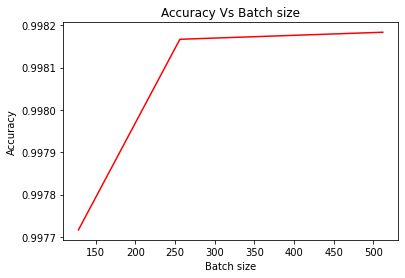

In [16]:
print(acc)
plt.plot(np.array(batch).reshape(3,1), np.array(acc).reshape(3,1), color = 'red')
plt.ylabel('Accuracy')
plt.xlabel('Batch size')
plt.title('Accuracy Vs Batch size')
plt.show()

**Which one performed best**

In [17]:
from tabulate import tabulate
mydata = [[128, 0.99771667],
          [256, 0.99816668],
          [512, 0.99818331]]
head = ["Batch Size", "Accuarcy"]
# Display Table
print(tabulate(mydata, headers=head, tablefmt="grid", numalign="center"))

+--------------+------------+
|  Batch Size  |  Accuarcy  |
+==============+============+
|     128      |  0.997717  |
+--------------+------------+
|     256      |  0.998167  |
+--------------+------------+
|     512      |  0.998183  |
+--------------+------------+


#####Based on the above results, we can say that for my case, batch = 512 gives highest accuarcy (0.998183).

**Effect of optimizer on Hour-glass shaped CNN**

In [18]:
batch=[512]
acc1=np.zeros(1)
acc2=np.zeros(1)
acc3=np.zeros(1)
for k in range(3):
  for i in range(len(batch)):    
        cnn_model_g = tf.keras.models.Sequential()
        cnn_model_g.add(tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
        cnn_model_g.add(tf.keras.layers.Conv2D(64, (3, 3), strides=(2, 2), padding='same', activation='relu'))
        cnn_model_g.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='same'))
        cnn_model_g.add(tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
        cnn_model_g.add(tf.keras.layers.Conv2D(128, (3, 3), strides=(2, 2), padding='same', activation='relu'))
        cnn_model_g.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2),padding='same'))
        cnn_model_g.add(tf.keras.layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
        cnn_model_g.add(tf.keras.layers.Conv2D(256, (3, 3), strides=(2, 2), padding='same', activation='relu'))
        cnn_model_g.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2),padding='same'))
        cnn_model_g.add(tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
        cnn_model_g.add(tf.keras.layers.Conv2D(128, (3, 3), strides=(2, 2), padding='same', activation='relu'))
        cnn_model_g.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2),padding='same'))
        cnn_model_g.add(tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
        cnn_model_g.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2),padding='same'))
        cnn_model_g.add(tf.keras.layers.Conv2D(64, (3, 3), strides=(2, 2), padding='same', activation='relu'))

        cnn_model_g.add(tf.keras.layers.Flatten())
        cnn_model_g.add(tf.keras.layers.Dense(512))
        cnn_model_g.add(tf.keras.layers.Activation('relu'))
        cnn_model_g.add(tf.keras.layers.Dense(10))
        cnn_model_g.add(tf.keras.layers.Activation('softmax'))

        if k==0:
          opt_lr = tf.keras.optimizers.Adam(learning_rate=0.001)
          cnn_model_g.compile(loss='sparse_categorical_crossentropy', optimizer=opt_lr, metrics=['accuracy'])
          cnn_model_g.build(input_shape=(1,28,28,1)) 
          accuracy1= cnn_model_g.fit(train_images, train_labels, batch_size=batch[i], epochs=25, verbose=0)
          acc1[i]=accuracy1.history['accuracy'][24]
        elif k==1:
          opt_lr = tf.keras.optimizers.SGD(learning_rate=0.001)
          cnn_model_g.compile(loss='sparse_categorical_crossentropy', optimizer=opt_lr, metrics=['accuracy'])
          cnn_model_g.build(input_shape=(1,28,28,1))
          accuracy2= cnn_model_g.fit(train_images, train_labels, batch_size=batch[i], epochs=25, verbose=0)
          acc2[i]=accuracy2.history['accuracy'][24]
        else:
          opt_lr = tf.keras.optimizers.RMSprop(learning_rate=0.001)
          cnn_model_g.compile(loss='sparse_categorical_crossentropy', optimizer=opt_lr, metrics=['accuracy'])
          cnn_model_g.build(input_shape=(1,28,28,1))
          accuracy3= cnn_model_g.fit(train_images, train_labels, batch_size=batch[i], epochs=25, verbose=0)
          acc3[i]=accuracy3.history['accuracy'][24]

In [19]:
print(acc1)
print(acc2)
print(acc3)

[0.99831665]
[0.11236667]
[0.99791664]


In [21]:
from tabulate import tabulate
mydata = [[0.99831665, 0.11236667, 0.99791664]]
head = ["Adam Accuracy", "SGD Accuracy", "RMSprop Accuracy"]
# Display Table
print(tabulate(mydata, headers=head, tablefmt="grid", numalign="center"))

+-----------------+----------------+--------------------+
|  Adam Accuracy  |  SGD Accuracy  |  RMSprop Accuracy  |
+=================+================+====================+
|    0.998317     |    0.112367    |      0.997917      |
+-----------------+----------------+--------------------+


**Comparison**

In [24]:
from tabulate import tabulate
mydata = [["Regular CNN", 0.0310057420283556, 0.9918000102043152, 0.06496333330869675, 0.9848999977111816],
          ["Inverted", 0.014482562430202961, 0.996666669845581, 0.04515833407640457, 0.9887999892234802],
          ["Hour-glass shaped CNN", 0.016877416521310806, 0.9958166480064392, 0.042658720165491104, 0.9890000224113464]]
head = ["CNN", "Train loss", "Train accuracy", "Test accuracy", "Test accuracy"]
# Display Table
print(tabulate(mydata, headers=head, tablefmt="grid", numalign="center"))

+-----------------------+--------------+------------------+-----------------+-----------------+
| CNN                   |  Train loss  |  Train accuracy  |  Test accuracy  |  Test accuracy  |
+=======================+==============+==================+=================+=================+
| Regular CNN           |  0.0310057   |      0.9918      |    0.0649633    |     0.9849      |
+-----------------------+--------------+------------------+-----------------+-----------------+
| Inverted              |  0.0144826   |     0.996667     |    0.0451583    |     0.9888      |
+-----------------------+--------------+------------------+-----------------+-----------------+
| Hour-glass shaped CNN |  0.0168774   |     0.995817     |    0.0426587    |      0.989      |
+-----------------------+--------------+------------------+-----------------+-----------------+


Adam and RMSprop otimizer gives better result instead of SGD. From all the tables, graphs and discussion, we can conclude that Adam optimizer with 0.001 learning rate and 512 batch size led to a proper accuracy with 25 epocs.